In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
file = sorted(os.listdir(os.path.join(os.getcwd(),'data')))[-1]

In [24]:
print(file)

vw_EventResults_Podium_WithTeamSelect (infostrada)_Snowboard.csv


In [25]:
path = os.path.join(os.getcwd(), "data", file) 
print(path)

/Users/stergios/Desktop/OMSA/CSE 6748 - Applied Analytics Practicum/USOPC---Age-Focused-Olympic-Competitive-Analysis/data/vw_EventResults_Podium_WithTeamSelect (infostrada)_Snowboard.csv


In [26]:
raw_data = pd.read_csv(path, low_memory=False)

In [32]:
sqldf("""select "Person ID", count(1) from raw_data group by 1 order by 2 desc""")

,Person ID,count(1)
0,-1.0,1182
1,333816.0,569
2,340515.0,564
3,334016.0,522
4,333880.0,502
...,...,...
5278,333897.0,2
5279,333856.0,2
5280,333841.0,2
5281,311061.0,2


In [62]:
data = process_data(path)

In [10]:
country_event_stats = read_query(data, 'country_event_stats.sql')
country_age_stats = read_query(data, 'country_age_stats.sql')
home_competition_stats = read_query(data, 'home_competition_stats.sql')

### Event stats by country and sport:

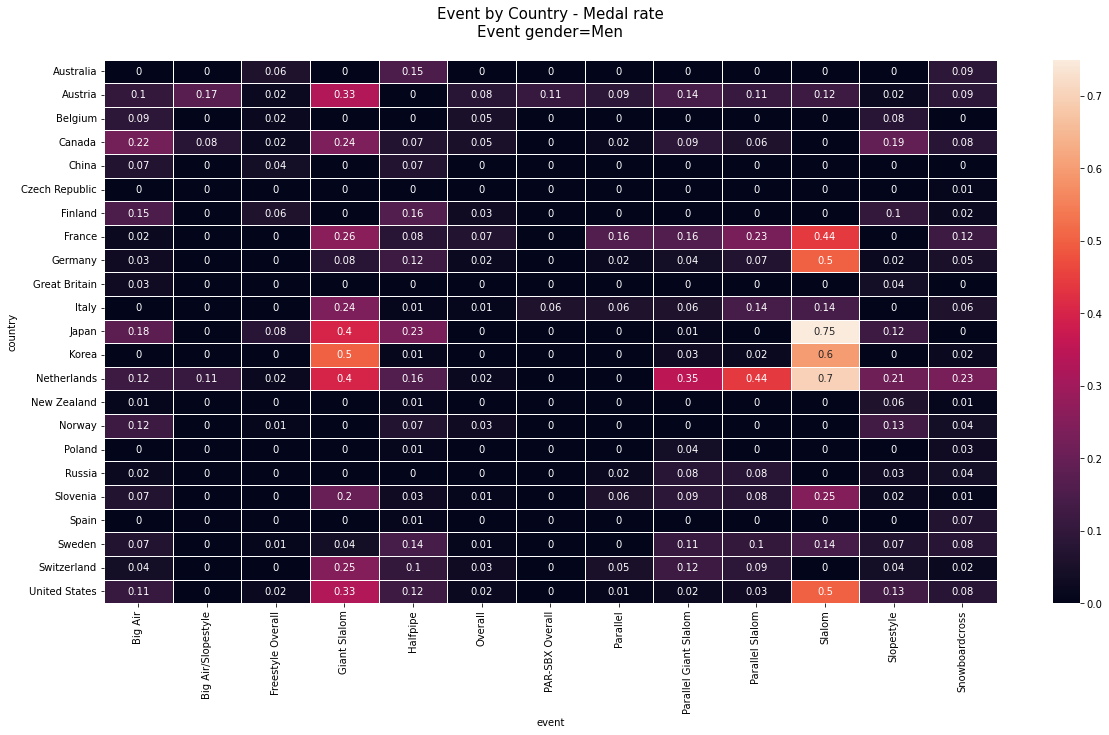

In [11]:
create_heatmap(df=country_event_stats, x='event', y='country', val='medal_rate', filtering={'event_gender':'Men'})

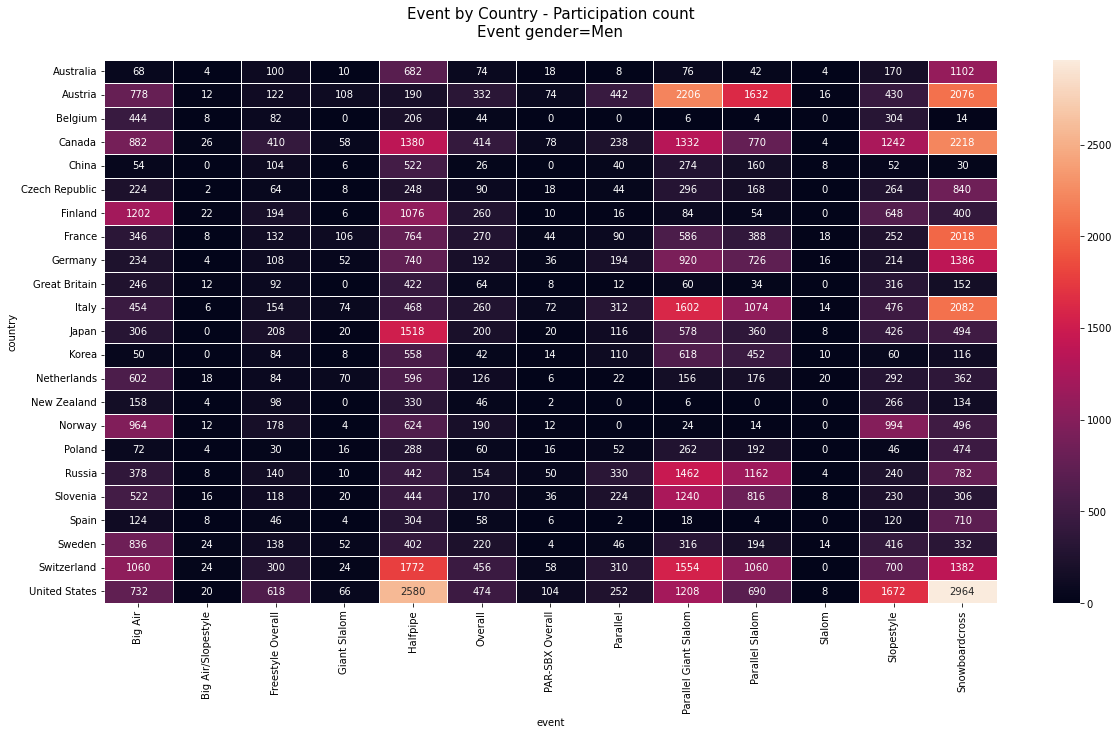

In [12]:
create_heatmap(df=country_event_stats, x='event', y='country', val='participation_count', filtering={'event_gender':'Men'})

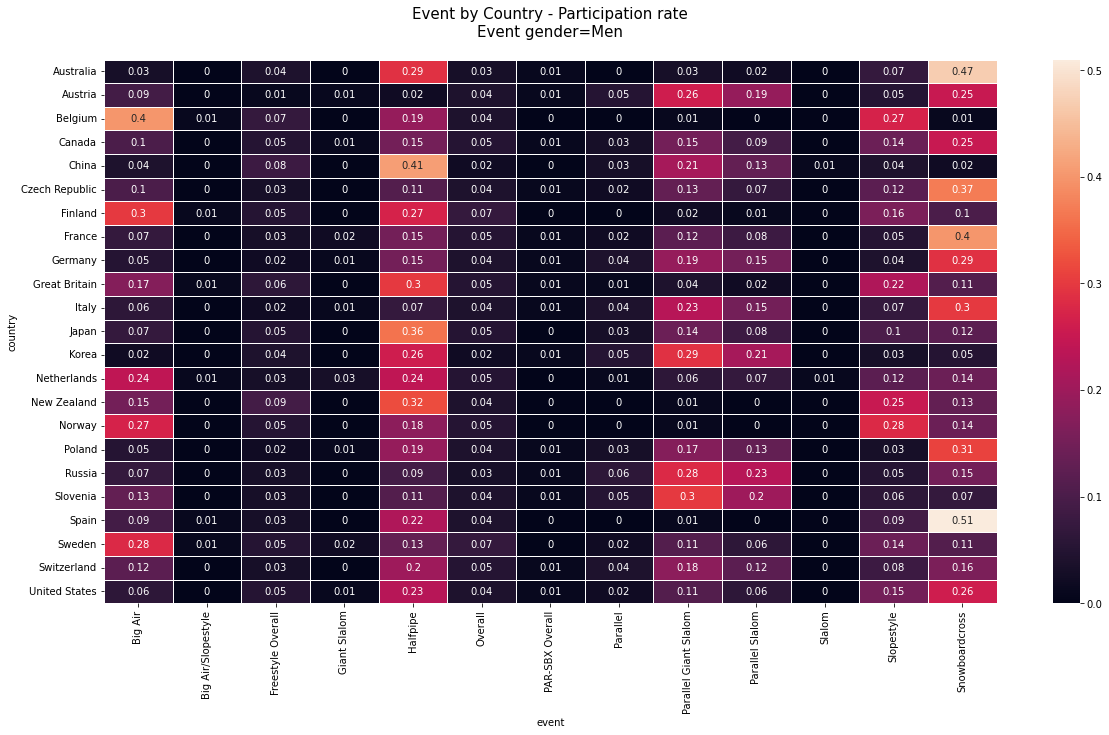

In [13]:
create_heatmap(df=country_event_stats, x='event', y='country', val='participation_rate', filtering={'event_gender':'Men'})

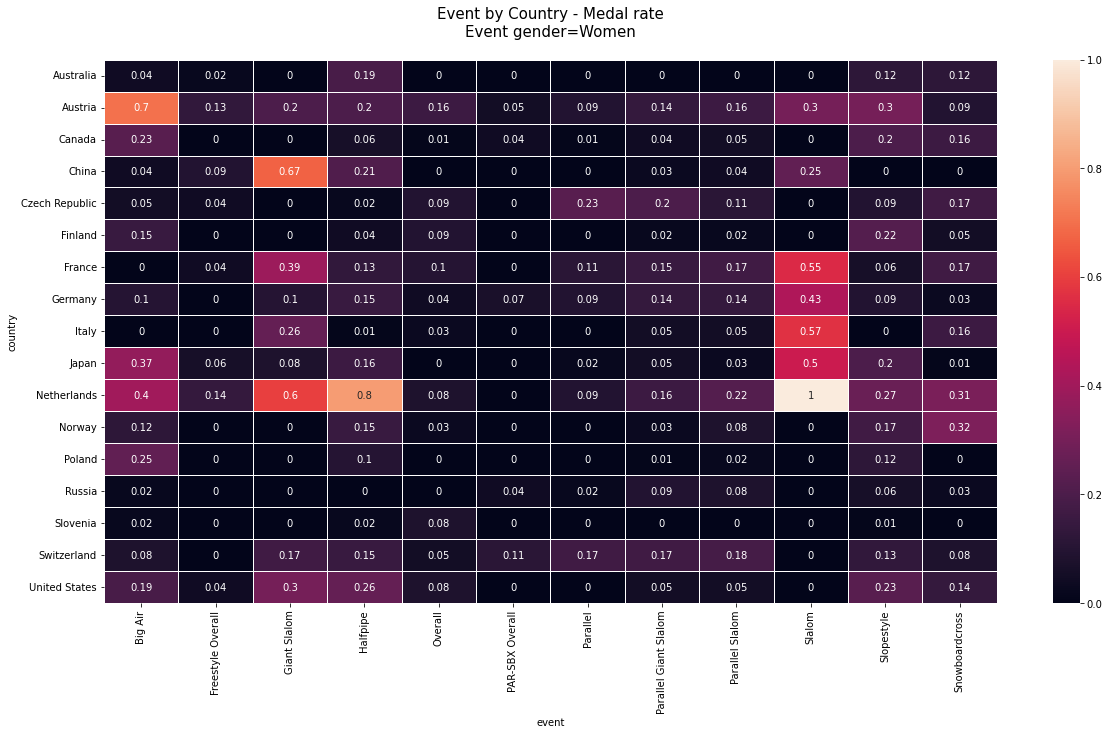

In [14]:
create_heatmap(df=country_event_stats, x='event', y='country', val='medal_rate', filtering={'event_gender':'Women'})

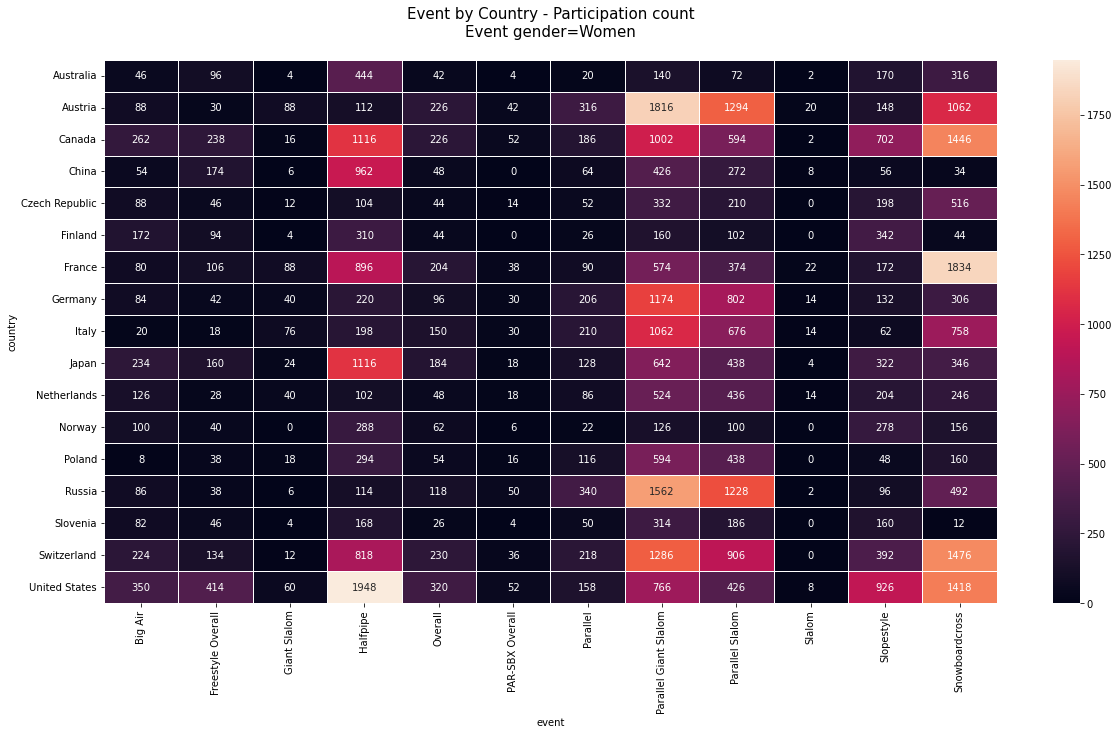

In [15]:
create_heatmap(df=country_event_stats, x='event', y='country', val='participation_count', filtering={'event_gender':'Women'})

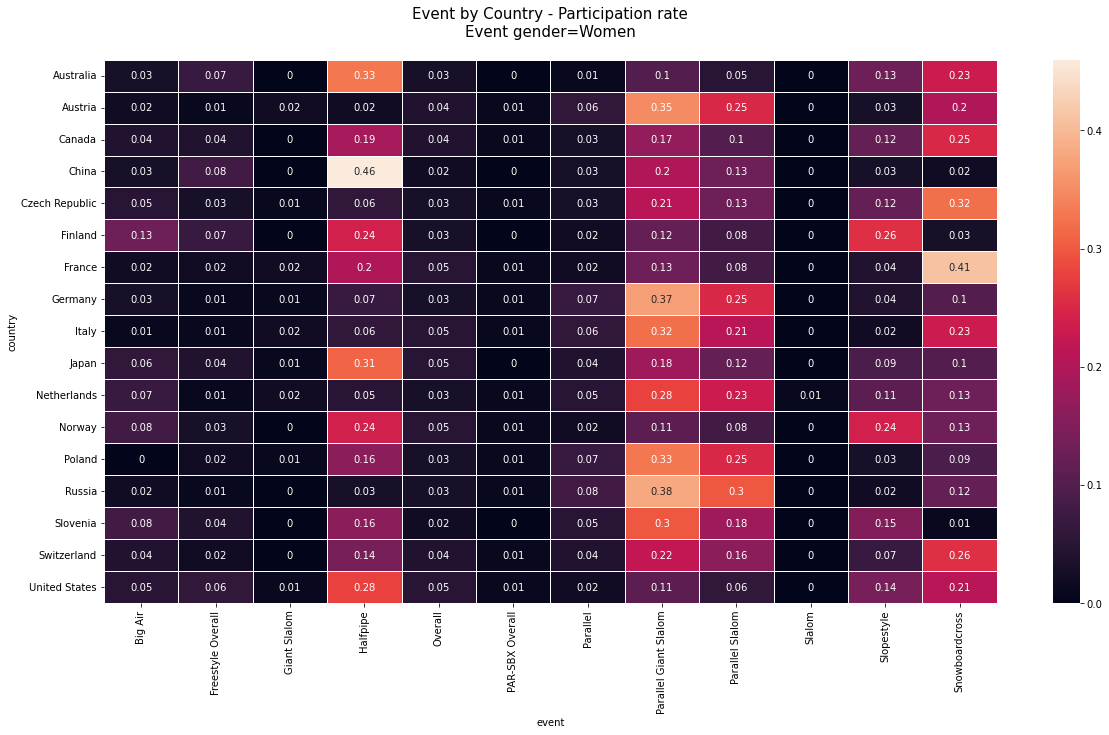

In [16]:
create_heatmap(df=country_event_stats, x='event', y='country', val='participation_rate', filtering={'event_gender':'Women'})

### Event stats by country and age:

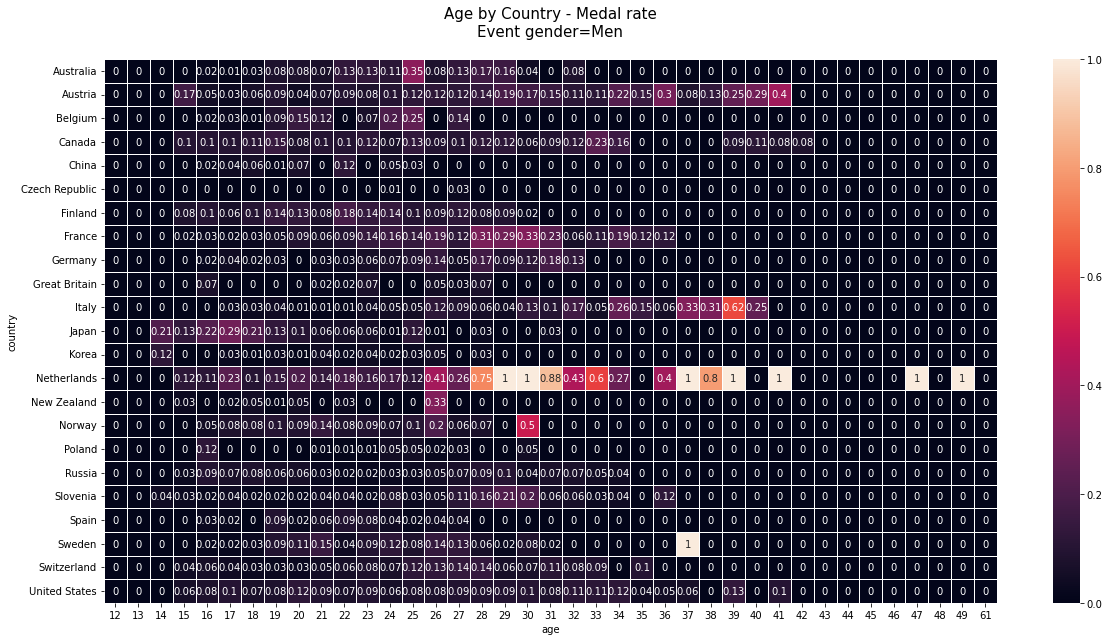

In [17]:
create_heatmap(df=country_age_stats, x='age', y='country', val='medal_rate', filtering={'event_gender':'Men'})

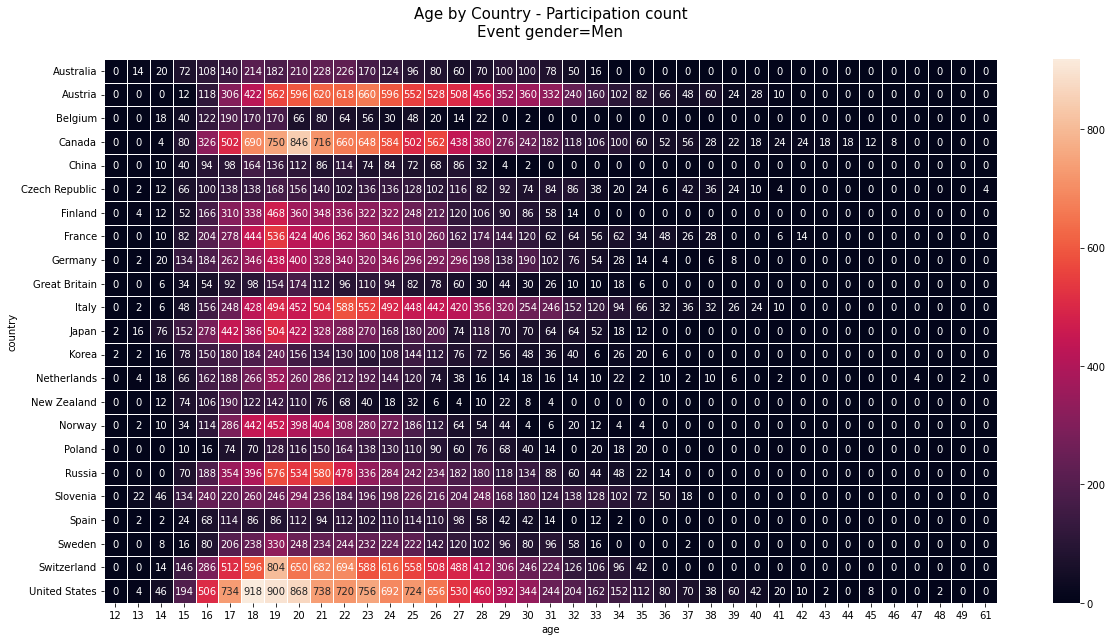

In [18]:
create_heatmap(df=country_age_stats, x='age', y='country', val='participation_count', filtering={'event_gender':'Men'})

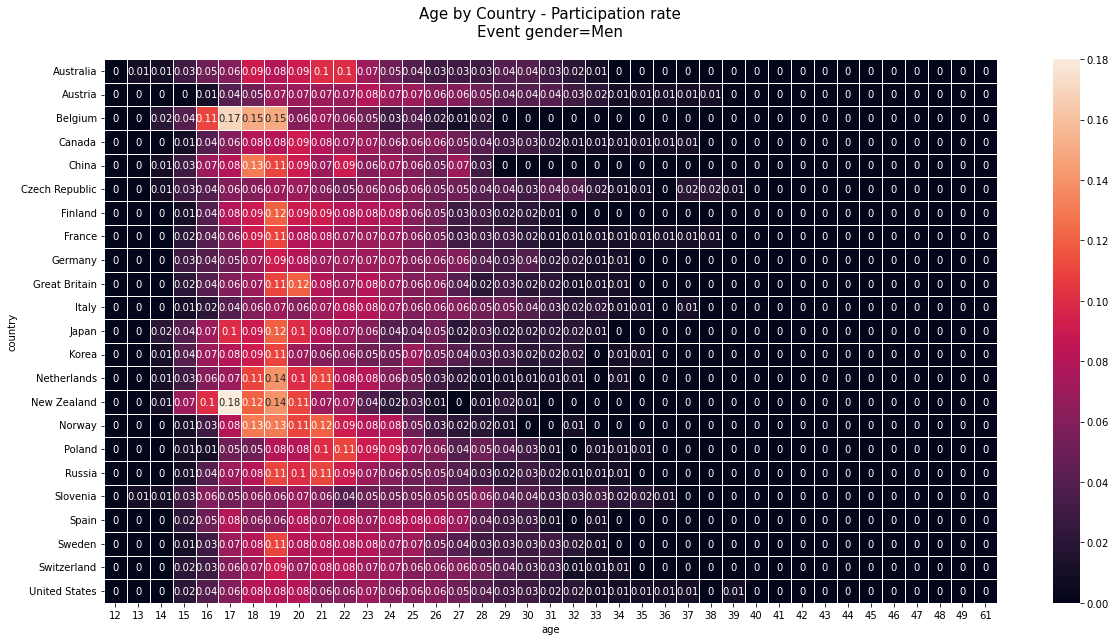

In [19]:
create_heatmap(df=country_age_stats, x='age', y='country', val='participation_rate', filtering={'event_gender':'Men'})

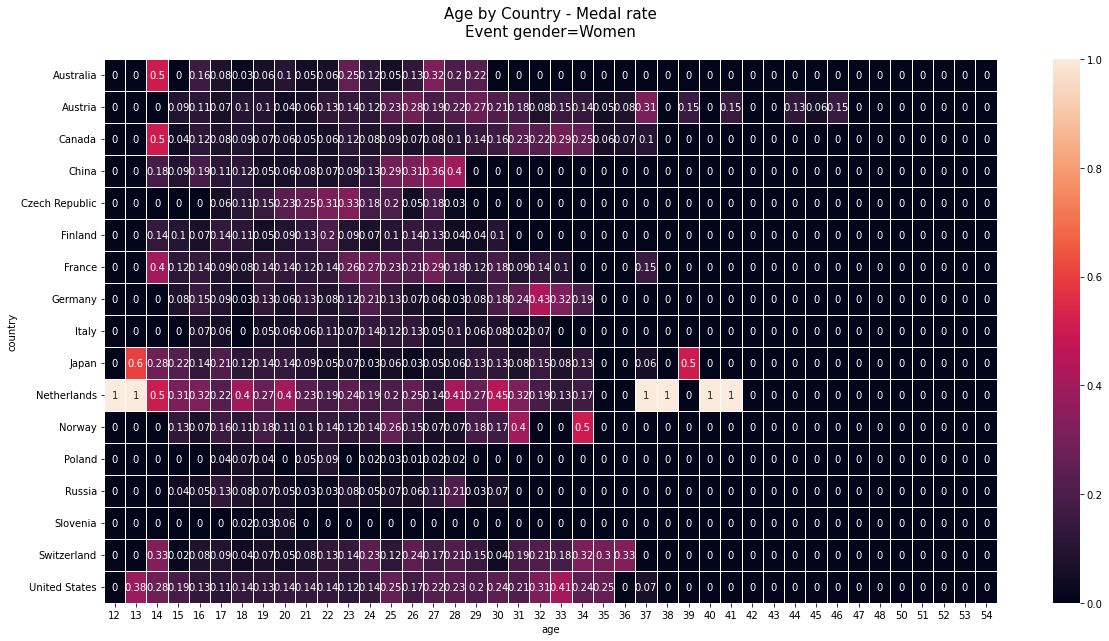

In [20]:
create_heatmap(df=country_age_stats, x='age', y='country', val='medal_rate', filtering={'event_gender':'Women'})

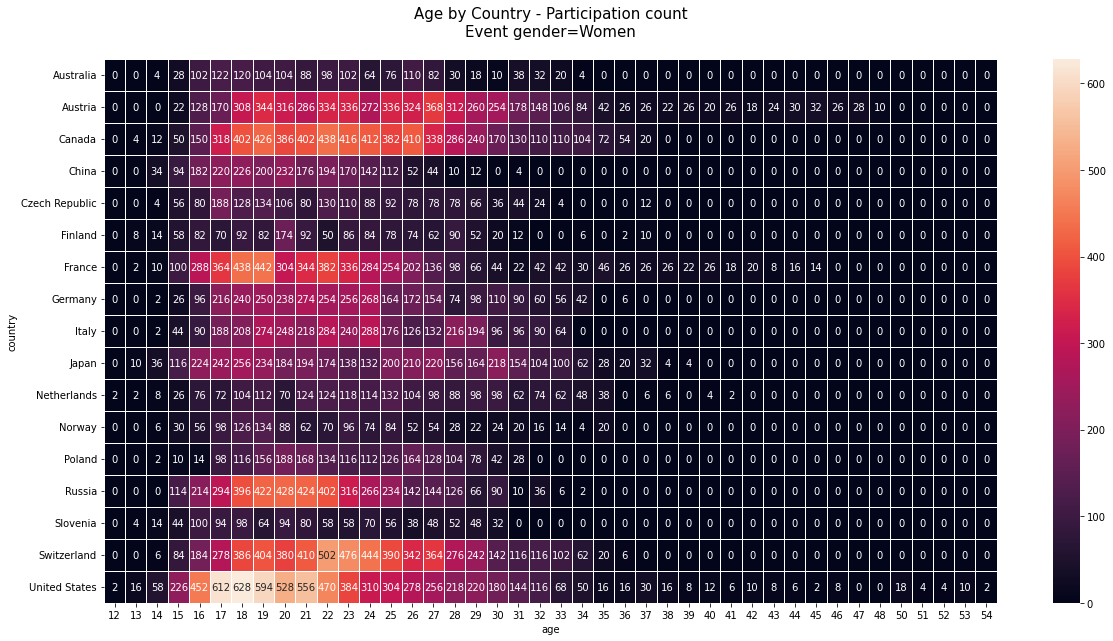

In [21]:
create_heatmap(df=country_age_stats, x='age', y='country', val='participation_count', filtering={'event_gender':'Women'})

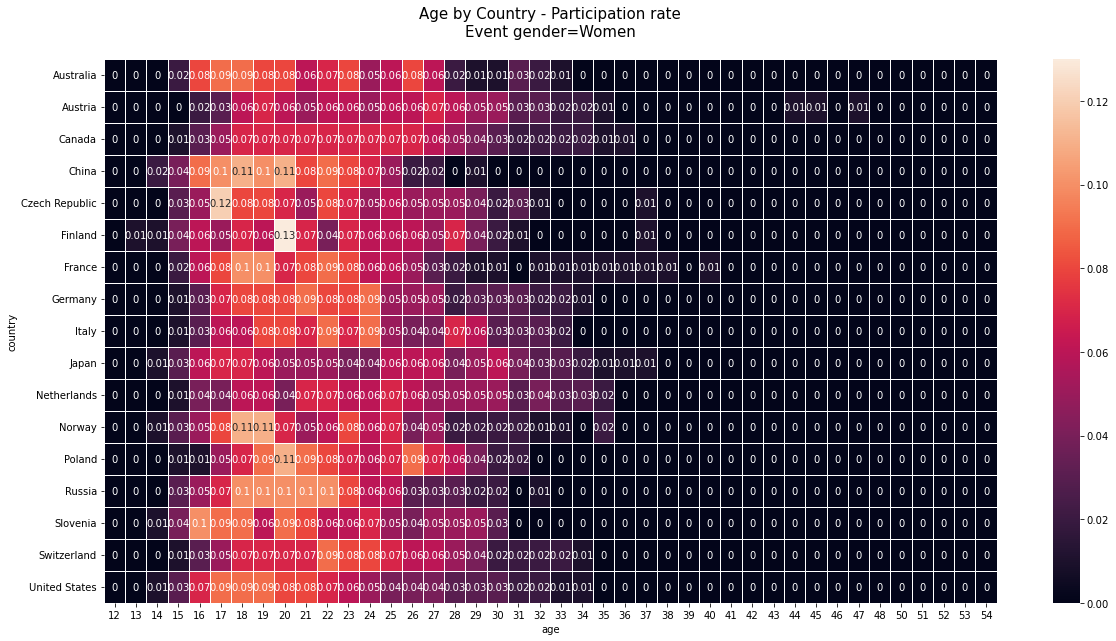

In [22]:
create_heatmap(df=country_age_stats, x='age', y='country', val='participation_rate', filtering={'event_gender':'Women'})

In [49]:
sqldf("""
select country, 
event_gender, 
age, 
participation_count, 
1.00 * participation_count/sum(participation_count) over (partition by country, event_gender)
from country_age_stats group by 1,2,3
""")

,country,event_gender,age,participation_count,"1.00 * participation_count/sum(participation_count) over (partition by country, event_gender)"
0,Andorra,Men,23,18,0.500000
1,Andorra,Men,27,18,0.500000
2,Australia,Men,16,108,0.050046
3,Australia,Men,17,140,0.064875
4,Australia,Men,18,214,0.099166
...,...,...,...,...,...
775,United States,Women,32,116,0.017277
776,United States,Women,33,68,0.010128
777,United States,Women,34,50,0.007447
778,United States,Women,35,16,0.002383


In [ ]:
sqldf("""select distinct person_age_years from data where competitor = 'Claudia Riegler' order by 1 """)

In [7]:
country_event_stats = read_query(data=data, query='country_event_stats.sql')

In [10]:
country_event_stats

,country,event,event_gender,medal_rate,participation_count
0,Andorra,Snowboardcross,Men,0.025316,158
1,Australia,Big Air,Women,0.043478,46
2,Australia,Freestyle Overall,Men,0.060000,100
3,Australia,Freestyle Overall,Women,0.020833,96
4,Australia,Halfpipe,Men,0.152493,682
...,...,...,...,...,...
341,United States,Slalom,Men,0.500000,8
342,United States,Slopestyle,Men,0.126794,1672
343,United States,Slopestyle,Women,0.233261,926
344,United States,Snowboardcross,Men,0.084345,2964


In [25]:
country_event_stats[['country', 'medal_rate', 'event']].pivot_table(columns='event', index='country')

medal_rate                                                    \
event             Big Air Big Air/Slopestyle Freestyle Overall Giant Slalom   
country                                                                       
Andorra               NaN                NaN               NaN          NaN   
Australia        0.043478                NaN          0.040417          NaN   
Austria          0.403687           0.166667          0.074863     0.268939   
Belgium          0.092752                NaN          0.024390          NaN   
Bulgaria              NaN                NaN               NaN          NaN   
Canada           0.225615           0.076923          0.019512     0.241379   
China            0.055556                NaN          0.065208     0.666667   
Croatia          0.020833                NaN               NaN          NaN   
Czech Republic   0.045455                NaN          0.043478          NaN   
Finland          0.152952                NaN          0.061856          NaN   
France           0.017341                NaN          0.037736     0.325257   
Germany          0.060440                NaN               NaN     0.088462   
Great Britain    0.111498                NaN          0.125000          NaN   
Hungary               NaN                NaN               NaN          NaN   
Iceland          0.133333                NaN               NaN          NaN   
Italy                 NaN                NaN               NaN     0.253201   
Japan            0.275264                NaN          0.069712     0.241667   
Korea                 NaN                NaN               NaN     0.500000   
Lithuania        0.062500                NaN               NaN          NaN   
Netherlands      0.258213           0.111111          0.083333     0.500000   
New Zealand      0.094564                NaN               NaN          NaN   
Norway           0.119129                NaN          0.011236          NaN   
Poland           0.250000                NaN               NaN          NaN   
Romania               NaN                NaN               NaN          NaN   
Russia           0.022210                NaN               NaN          NaN   
Slovakia         0.200000                NaN          0.100000          NaN   
Slovenia         0.048594                NaN               NaN     0.200000   
Spain            0.043478                NaN          0.052632          NaN   
Sweden           0.287081                NaN          0.014493     0.057692   
Switzerland      0.059990                NaN               NaN     0.208333   
Turkey                NaN                NaN               NaN          NaN   
Ukraine               NaN                NaN               NaN          NaN   
United States    0.154520                NaN          0.029032     0.316667   

                                                              \
event           Halfpipe   Overall PAR-SBX Overall  Parallel   
country                                                        
Andorra              NaN       NaN             NaN       NaN   
Australia       0.170841       NaN             NaN       NaN   
Austria         0.196429  0.118803        0.077864  0.089553   
Belgium              NaN  0.045455             NaN       NaN   
Bulgaria             NaN       NaN             NaN  0.074074   
Canada          0.067041  0.030995        0.038462  0.013780   
China           0.143467       NaN             NaN       NaN   
Croatia              NaN       NaN             NaN       NaN   
Czech Republic  0.019231  0.090909             NaN  0.230769   
Finland         0.097422  0.060839             NaN       NaN   
France          0.104922  0.082353             NaN  0.133333   
Germany         0.136732  0.031250        0.066667  0.053999   
Great Britain   0.039407       NaN             NaN       NaN   
Hungary              NaN       NaN             NaN       NaN   
Iceland              NaN       NaN             NaN       NaN   
Italy           0.

In [133]:
def create_heatmap(df, x, y, val, filtering=None, figsize=(20,10), ret_df=False, save=False):
    img_title = f'{x} by {y} - {val}\n'
    
    if filtering:
        for k,v in filtering.items():
            df = df[df[k]==v]
        img_title += ' - '.join([k + '=' + v for k,v in filtering.items()])+'\n'
    
    
    heat = df[[x,y,val]].pivot_table(index=y, columns=x).fillna(0).round(2)
    heat.columns = heat.columns.droplevel()
    
    if heat.shape[0]==1:
        heat.T.plot.bar(figsize=figsize, grid='both')
    else:
        plt.figure(figsize=figsize)
        plt.title(img_title, fontsize=15)
        sns.heatmap(heat, annot=True, fmt='g', linewidths=.5)
    
    if save:
        plt.savefig('img.png')
    if ret_df:
        return heat

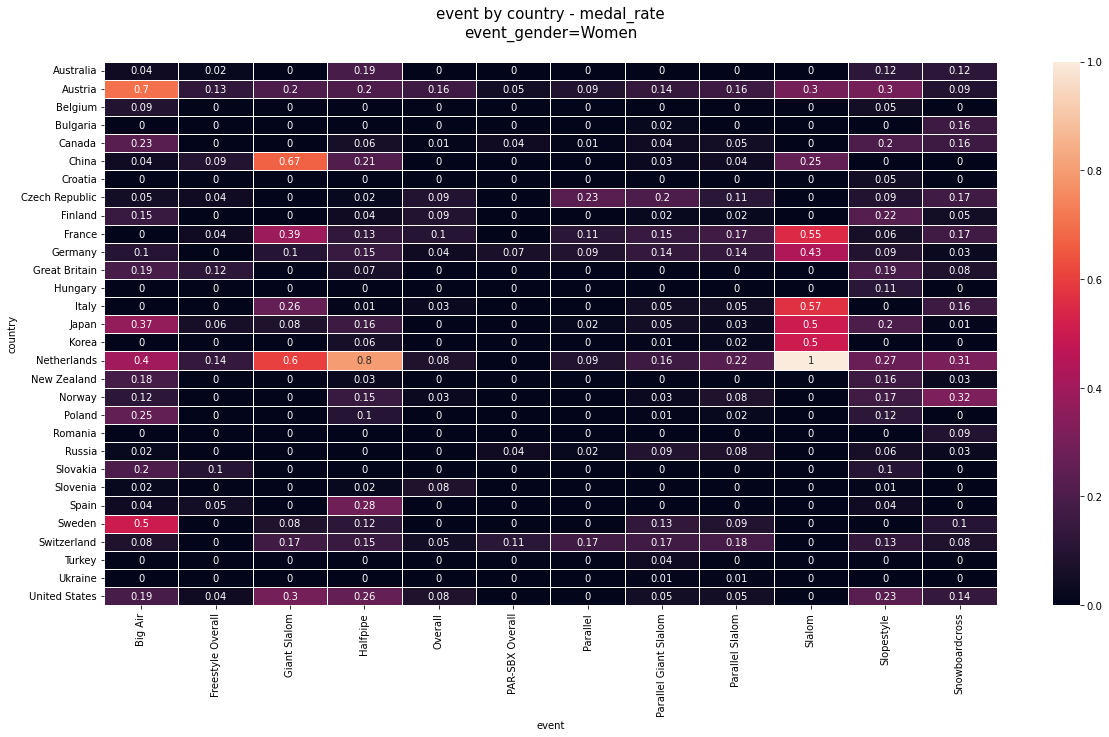

In [139]:
create_heatmap(country_event_stats, 'event', 'country', 'medal_rate', {'event_gender':'Women'})

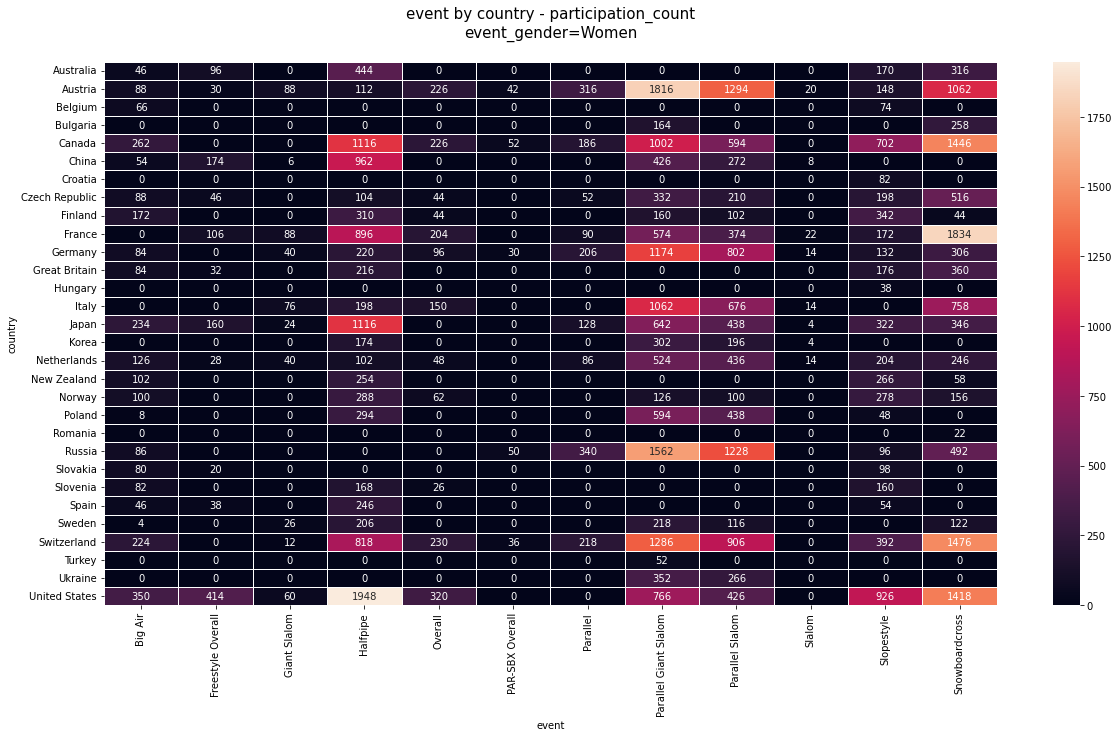

In [140]:
create_heatmap(df=country_event_stats, x='event', y='country', val='participation_count', filtering={'event_gender':'Women'})

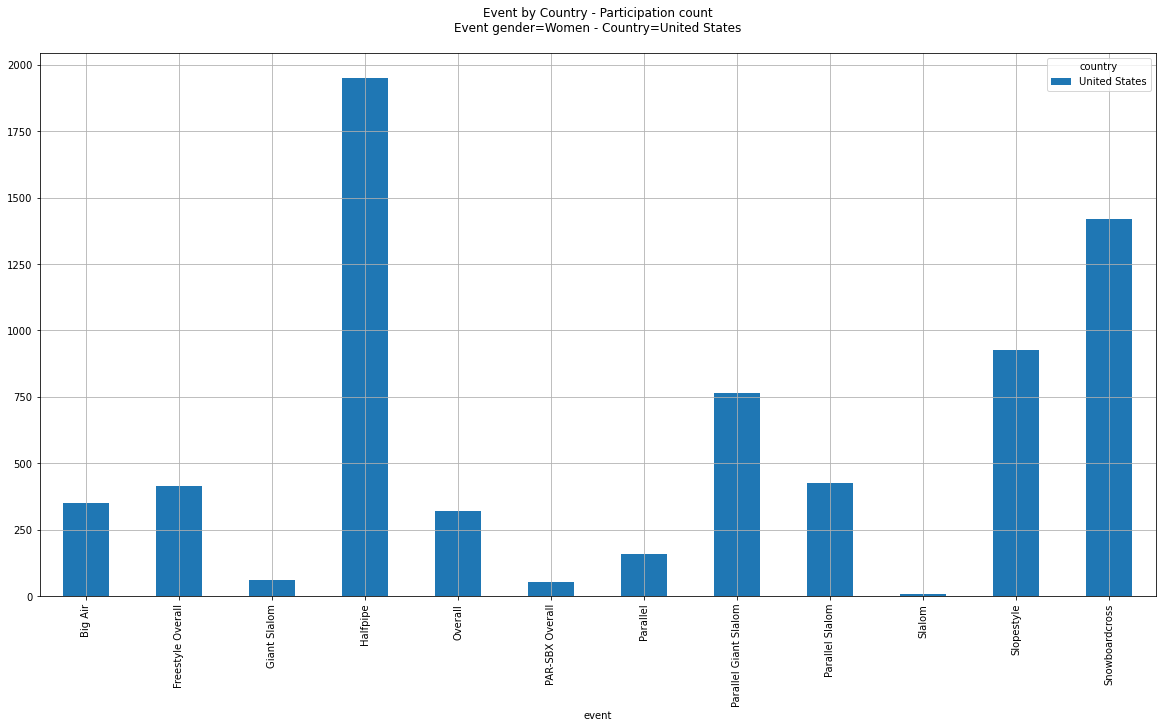

In [140]:
create_heatmap(df=country_event_stats, x='event', y='country', val='participation_count', filtering={'event_gender':'Women', 'country':'United States'})

In [135]:
home_comp_stats = read_query(data, "home_competition_stats.sql")

In [136]:
home_comp_stats

,country,home_medal_rate,home_competition_count,away_medal_rate,away_competition_count
0,Austria,0.118563,1670,0.121768,11990
1,Belgium,0.200000,10,0.059908,1302
2,Bulgaria,0.090909,44,0.050964,1452
3,Canada,0.113872,966,0.100517,13928
4,China,0.122807,114,0.086957,3266
5,Czech Republic,0.019608,102,0.059259,3780
6,Finland,0.166667,108,0.106548,5162
7,France,0.203540,226,0.127237,9274
8,Germany,0.076487,706,0.083173,7262
9,Great Britain,0.040000,50,0.053182,2294


<AxesSubplot:title={'center':'Medal Rate by Country - Home vs Away Competitions\n'}, xlabel='country'>

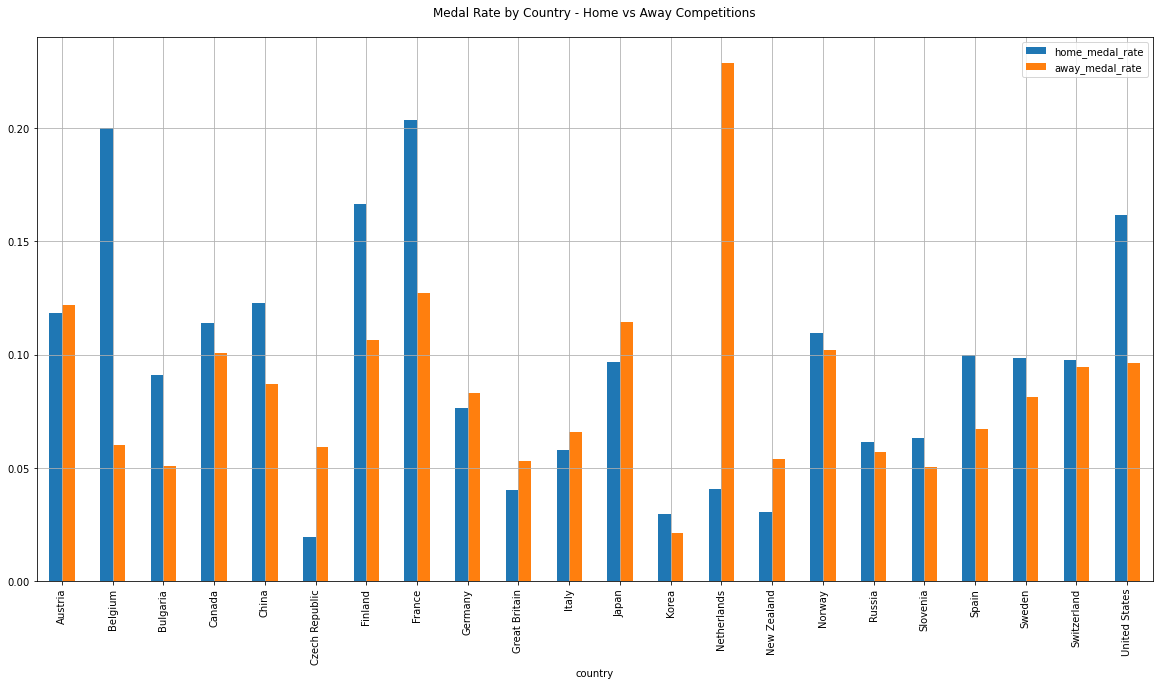

In [142]:
# plt.figure(figsize=(20,10))
home_comp_stats[['country', 'home_medal_rate', 'away_medal_rate']].plot.bar(x='country', figsize=(20,10), grid='both', title='Medal Rate by Country - Home vs Away Competitions\n')

In [28]:
pd.value_counts(data.is_home_competition)

0    149294
1     15038
Name: is_home_competition, dtype: int64

In [141]:
country_age_stats = read_query(data, query='country_age_stats.sql')

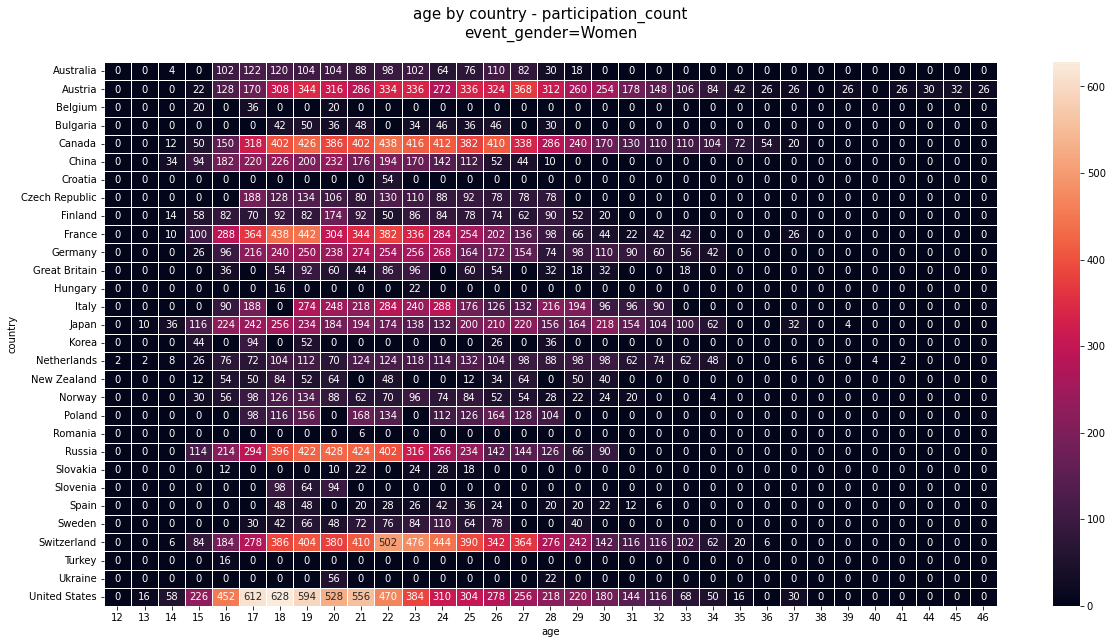

In [147]:
create_heatmap(country_age_stats, 'age', 'country','participation_count',{'event_gender':'Women'})

In [144]:
data.head()

,class,competition_date,competition_city,competition_country,event_gender,gender_male,gender_female,event_and_gender,event,sport_name,medal,won_medal,country,is_home_competition,age,rank
0,Elite,11-30-1999,None,None,Men,1,0,Parallel Giant Slalom - Men,Parallel Giant Slalom,Snowboard,None,0,Italy,0,29.0,7.0
1,Elite,11-30-1999,None,None,Men,1,0,Parallel Giant Slalom - Men,Parallel Giant Slalom,Snowboard,None,0,Austria,0,26.0,8.0
2,Elite,12-03-1999,None,None,Men,1,0,Snowboardcross - Men,Snowboardcross,Snowboard,G,1,Sweden,0,26.0,1.0
3,Elite,12-03-1999,None,None,Men,1,0,Snowboardcross - Men,Snowboardcross,Snowboard,S,1,Switzerland,0,24.0,2.0
4,Elite,12-03-1999,None,None,Men,1,0,Snowboardcross - Men,Snowboardcross,Snowboard,B,1,Australia,0,28.0,3.0


In [145]:
features = data[['gender_male', 'event', 'won_medal', 'country', 'is_home_competition', 'age', 'rank']]

In [146]:
events

NameError: name 'events' is not defined

In [148]:
winning_countries = data[data.won_medal == 1].country.unique()

In [149]:
winning_countries

array(['Sweden', 'Switzerland', 'Australia', 'Italy', 'Austria', 'France',
       'Germany', 'United States', 'Canada', 'Norway', 'Great Britain',
       'Japan', 'Poland', 'Netherlands', 'Finland', 'Slovenia', 'Russia',
       'China', 'Belgium', 'Spain', 'Czech Republic', 'Bulgaria',
       'Croatia', 'Korea', 'Slovakia', 'Ukraine', 'New Zealand',
       'Hungary', 'Turkey', 'Iceland', 'Romania', 'Andorra', 'Lithuania'],
      dtype=object)

In [150]:
for c in winning_countries:
    features.loc[:,c] = features.country.apply(lambda x: 1 if x==c else 0)

/Users/stergios/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [151]:
events = features.event.unique()

In [152]:
features = features.drop('country', axis=1)

In [153]:
event_data = {}
for e in events:
    event_data[e] = features[features.event == e].drop('event', axis=1)

In [154]:
event_data.keys()

dict_keys(['Parallel Giant Slalom', 'Snowboardcross', 'Overall', 'Parallel', 'Halfpipe', 'Giant Slalom', 'Parallel Slalom', 'Big Air', 'Slalom', 'Slopestyle', 'PAR-SBX Overall', 'Freestyle Overall', 'Big Air/Slopestyle'])

In [155]:
event_data['Snowboardcross']

,gender_male,won_medal,is_home_competition,age,rank,Sweden,Switzerland,Australia,Italy,Austria,...,Korea,Slovakia,Ukraine,New Zealand,Hungary,Turkey,Iceland,Romania,Andorra,Lithuania
2,1,1,0,26.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,24.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,28.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,25.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,22.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164007,1,0,0,21.0,27.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164008,1,0,0,21.0,25.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
164009,1,0,0,20.0,20.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164010,1,0,0,21.0,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ML part

In [153]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_absolute_error, classification_report
from sklearn.preprocessing import PolynomialFeatures

In [247]:
ts_model_data = create_features(data, 'Snowboardcross')

In [248]:
model_data = ts_model_data.drop(['f_rank','person_id'], axis=1)

In [249]:
model_data.head()

,gender_male,ft_rank,ft_age,ft_won_medal,t_rank,t_age,t_won_medal,s_rank,s_age,s_won_medal,...,Czech Republic,Korea,Bulgaria,China,Belgium,Ukraine,Andorra,Slovakia,Hungary,Lithuania
0,1,72.0,33.0,0,44.0,35.0,0,63.0,36.0,0,...,0,0,0,0,0,0,0,0,0,0
128,1,42.0,33.0,0,52.0,34.0,0,46.0,34.0,0,...,0,0,0,0,0,0,0,0,0,0
129,1,36.0,33.0,0,42.0,33.0,0,52.0,34.0,0,...,0,0,0,0,0,0,0,0,0,0
130,1,11.0,33.0,0,36.0,33.0,0,42.0,33.0,0,...,0,0,0,0,0,0,0,0,0,0
131,1,27.0,33.0,0,11.0,33.0,0,36.0,33.0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
X_train, X_test, y_train, y_test = train_test_split(model_data.drop('f_won_medal', axis=1), model_data['f_won_medal'], test_size=0.1, random_state=42)

In [326]:
rfc = RandomForestClassifier(n_estimators=500, class_weight={0:1, 1:10}, min_samples_leaf=6)

In [327]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, min_samples_leaf=6,
                       n_estimators=500)

In [328]:
preds = rfc.predict(X_test)

In [329]:
pred_train = rfc.predict(X_train)

In [330]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1439
           1       0.33      0.53      0.41       128

    accuracy                           0.87      1567
   macro avg       0.64      0.72      0.67      1567
weighted avg       0.90      0.87      0.89      1567

[[1302  137]
 [  60   68]]


In [331]:
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     12863
           1       0.46      0.85      0.60      1231

    accuracy                           0.90     14094
   macro avg       0.72      0.88      0.77     14094
weighted avg       0.94      0.90      0.91     14094

[[11657  1206]
 [  187  1044]]


In [356]:
fi = sorted([(f,i) for f,i in zip(X_train, rfc.feature_importances_)], key=lambda x:x[1], reverse=True)
imps = {}
mi = []
for f,i in fi:
    if i>0.01:
        print(f, ':', i)
        mi.append(f)
        imps[f.capitalize()] = round(i,2)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Regressor

In [338]:
r_model_data = create_features(data, 'Snowboardcross')

In [339]:
r_model_data = r_model_data.drop(['f_won_medal','person_id'], axis=1)

In [342]:
r_model_data.columns

Index(['gender_male', 'ft_rank', 'ft_age', 'ft_won_medal', 't_rank', 't_age',
       't_won_medal', 's_rank', 's_age', 's_won_medal', 'f_rank', 'f_age',
       'f_is_home_competition', 'United States', 'Austria', 'Norway',
       'Germany', 'France', 'Italy', 'Canada', 'Switzerland', 'Sweden',
       'Finland', 'Spain', 'Japan', 'Slovenia', 'Poland', 'Netherlands',
       'Russia', 'New Zealand', 'Great Britain', 'Australia', 'Croatia',
       'Czech Republic', 'Korea', 'Bulgaria', 'China', 'Belgium', 'Ukraine',
       'Andorra', 'Slovakia', 'Hungary', 'Lithuania'],
      dtype='object')

In [344]:
X_train, X_test, y_train, y_test = train_test_split(r_model_data.drop('f_rank', axis=1), r_model_data['f_rank'], test_size=0.1, random_state=42)

In [390]:
rfr = RandomForestClassifier(n_estimators=500, min_samples_leaf=13)

In [391]:
rfr.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=13, n_estimators=500)

In [392]:
r_preds = rfr.predict(X_test)
r_pred_train = rfr.predict(X_train)

In [393]:
print(mean_absolute_error(y_test, r_preds))
# print(confusion_matrix(y_test, r_preds))

10.797702616464582


In [394]:
print(mean_absolute_error(y_train, r_pred_train))
# print(confusion_matrix(y_train, r_pred_train))

6.543351780899673


In [395]:
fi = sorted([(f,i) for f,i in zip(X_train, rfr.feature_importances_)], key=lambda x:x[1], reverse=True)
imps = {}
mi = []
for f,i in fi:
    if i>0.01:
        print(f, ':', i)
        mi.append(f)
        imps[f.capitalize()] = round(i,2)

s_rank : 0.16484526293928448
t_rank : 0.14884323471175623
ft_rank : 0.14505152178606762
ft_age : 0.07668394732420648
f_age : 0.0759892747473032
t_age : 0.07505463327000135
s_age : 0.07426319777919149
gender_male : 0.039195463359747953
s_won_medal : 0.023282820981691443
ft_won_medal : 0.017373814175379188
United States : 0.01675653530841645
t_won_medal : 0.01591018494547361
France : 0.014988711262775985
Canada : 0.014721291588722454
Austria : 0.013802844971461864
Italy : 0.012052042074272636
Switzerland : 0.011253763202083416
f_is_home_competition : 0.011104520118660276


In [399]:
list(zip(y_test[r_preds==1], r_preds[r_preds==1]))

[(1.0, 1.0),
 (5.0, 1.0),
 (8.0, 1.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (9.0, 1.0),
 (2.0, 1.0),
 (35.0, 1.0),
 (2.0, 1.0),
 (12.0, 1.0),
 (7.0, 1.0),
 (1.0, 1.0),
 (20.0, 1.0),
 (6.0, 1.0),
 (8.0, 1.0),
 (4.0, 1.0),
 (17.0, 1.0),
 (9.0, 1.0),
 (39.0, 1.0),
 (4.0, 1.0),
 (4.0, 1.0),
 (18.0, 1.0),
 (12.0, 1.0),
 (3.0, 1.0),
 (2.0, 1.0),
 (40.0, 1.0),
 (18.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (17.0, 1.0),
 (7.0, 1.0),
 (3.0, 1.0),
 (12.0, 1.0),
 (3.0, 1.0),
 (2.0, 1.0),
 (17.0, 1.0),
 (4.0, 1.0),
 (32.0, 1.0),
 (7.0, 1.0),
 (14.0, 1.0),
 (25.0, 1.0),
 (2.0, 1.0),
 (3.0, 1.0),
 (6.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (5.0, 1.0),
 (9.0, 1.0),
 (8.0, 1.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (18.0, 1.0),
 (2.0, 1.0),
 (4.0, 1.0),
 (9.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (2.0, 1.0),
 (21.0, 1.0),
 (7.0, 1.0),
 (13.0, 1.0),
 (1.0, 1.0),
 (3.0, 1.0),
 (21.0, 1.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (8.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (3.0, 1.0),
 (2.0, 1.0),
 (2.0, 1.0),
 (4.0, 1.0),
 (9.0, 1.0),
 (2.0,

In [382]:
rfr.feature_importances_

array([0.02482398, 0.14209456, 0.08476388, 0.01112308, 0.14340292,
       0.08106864, 0.01102138, 0.15106852, 0.08108264, 0.0125839 ,
       0.08446198, 0.01390767, 0.01820512, 0.01565727, 0.00366451,
       0.00906181, 0.01622203, 0.01349848, 0.01664665, 0.01257931,
       0.00167832, 0.00290563, 0.00432336, 0.00433698, 0.00194244,
       0.00429934, 0.00356146, 0.00687516, 0.00087504, 0.00269796,
       0.00799445, 0.        , 0.00730504, 0.00053414, 0.00214576,
       0.        , 0.        , 0.        , 0.00130815, 0.00027845,
       0.        , 0.        ])

In [167]:
y_train.min()

False

In [168]:
pred_train.min()

False

In [169]:
rfc = RandomForestClassifier(n_estimators=1000, class_weight={0:1, 1:12}, min_samples_leaf=10, criterion='entropy')

In [170]:
model_data = event_data['Parallel Giant Slalom']
model_data = model_data[model_data.gender_male==1].drop(['rank'], axis=1)

In [171]:
X = model_data.drop('won_medal', axis=1)
y = model_data['won_medal']

In [172]:
poly = PolynomialFeatures()

In [173]:
X_p = poly.fit_transform(X)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [175]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 12}, criterion='entropy',
                       min_samples_leaf=10, n_estimators=1000)

In [176]:
preds = rfc.predict(X_test)
pred_train = rfc.predict(X_train)

In [177]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[987 510]
 [ 37  93]]
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      1497
           1       0.15      0.72      0.25       130

    accuracy                           0.66      1627
   macro avg       0.56      0.69      0.52      1627
weighted avg       0.90      0.66      0.74      1627



In [178]:
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[9117 4402]
 [ 205  919]]
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     13519
           1       0.17      0.82      0.29      1124

    accuracy                           0.69     14643
   macro avg       0.58      0.75      0.54     14643
weighted avg       0.92      0.69      0.76     14643



In [198]:
pd.value_counts(y_train)

0    13064
1     1214
Name: f_won_medal, dtype: int64

In [180]:
13519/1124

12.027580071174377

In [172]:
fi = sorted([(f,i) for f,i in zip(X_train, rfr.feature_importances_)], key=lambda x:x[1], reverse=True)
imps = {}
mi = []
for f,i in fi:
    if i>0.01:
        print(f, ':', i)
        mi.append(f)
        imps[f.capitalize()] = round(i,2)

s_rank : 0.18964951053262039
t_rank : 0.17402280527242897
person_id : 0.1408692812208609
f_age : 0.09509273678261096
t_age : 0.09416286208363699
s_age : 0.08671766901685012
s_won_medal : 0.03525031278177475
t_won_medal : 0.027745497448466282
gender_male : 0.02213412401718635
f_is_home_competition : 0.01598538051740061
United States : 0.013225495056212955
France : 0.012585968296943799
Canada : 0.012215814163939853
Austria : 0.012166845722967829
Italy : 0.010887019536707952


In [186]:
imps = pd.Series(imps)

<AxesSubplot:title={'center':'Feature Importance - Rrandom Forest Classifier'}>

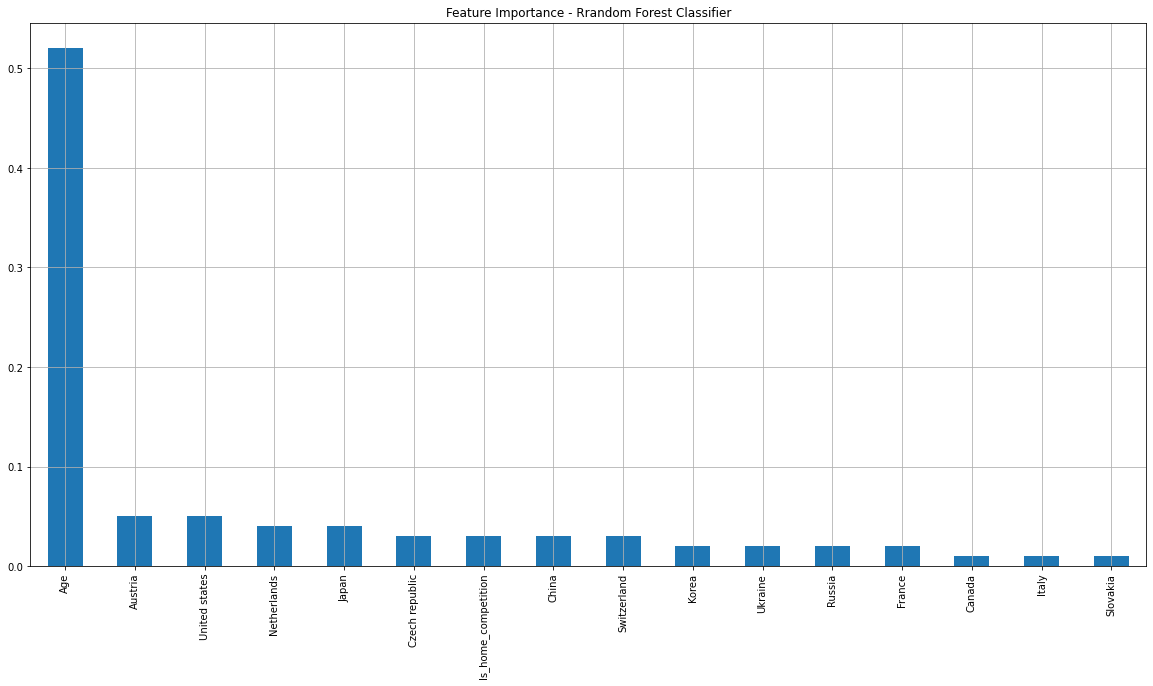

In [191]:
imps.sort_values(ascending=False).plot.bar(figsize=(20,10), grid='both', title='Feature Importance - Rrandom Forest Classifier')

In [185]:
country_age_stats = read_query(data, 'country_age_stats.sql')

<AxesSubplot:xlabel='age'>

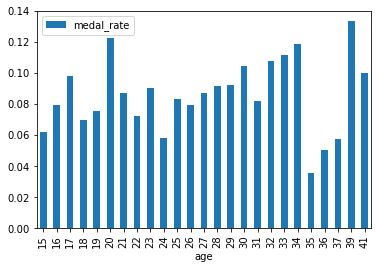

In [219]:
country_age_stats[(country_age_stats.country=='United States') & (country_age_stats.event_gender == 'Men')].plot.bar(x='age', y='medal_rate')

<AxesSubplot:xlabel='age'>

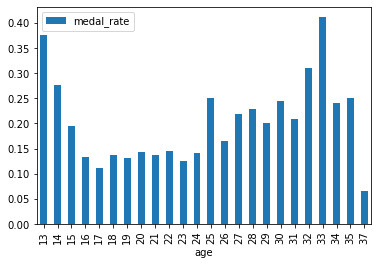

In [220]:
country_age_stats[(country_age_stats.country=='United States') & (country_age_stats.event_gender == 'Women')].plot.bar(x='age', y='medal_rate')

<AxesSubplot:xlabel='age'>

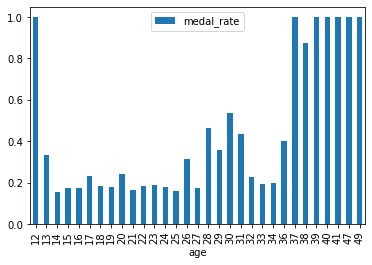

In [210]:
country_age_stats[country_age_stats.country=='Netherlands'].plot.bar(x='age', y='medal_rate')